In [70]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [71]:
mnist = fetch_openml('mnist_784', version='active')
images = mnist.data
labels = mnist.target

shape = images.shape
shape



(70000, 784)

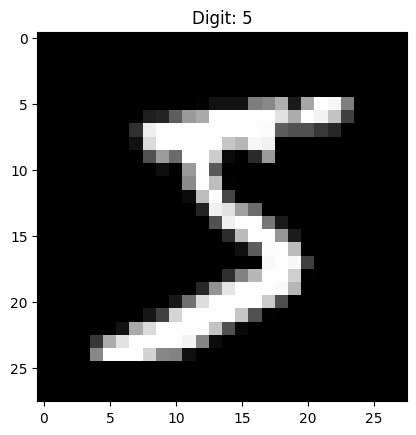

In [72]:
im0 = images.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(im0, cmap='gray', interpolation='nearest')
plt.title(f"Digit: {labels[0]}")
plt.show()

In [73]:
# Prepare a subset of data
size = 10000
rand_idx = np.random.choice(images.shape[0], size)
data_X = images.iloc[rand_idx] / 255.0
Y = labels.iloc[rand_idx]
X_train, X_test, y_train, y_test = train_test_split(data_X, Y, test_size=0.15, random_state=42)

X_train.shape, X_test.shape



((8500, 784), (1500, 784))

In [74]:
# create a classifier: a support vector classifier
classifier = svm.SVC(C=1, gamma=0.001)
start_time = time.perf_counter()
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)
end_time = time.perf_counter()
print(f"Training time: {end_time - start_time:.4f} seconds")


Training time: 23.1720 seconds


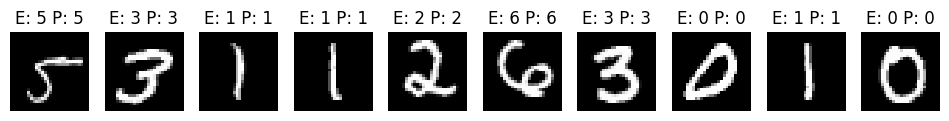

In [75]:
expected = y_test
predicted = classifier.predict(X_test)

# plot n-first expected and predicted values
n = 10
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test.iloc[i].to_numpy().reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.title(f"E: {expected.iloc[i]} P: {predicted[i]}")
    plt.axis('off')

